In [16]:
#Source code by Garcia#9023
import random
import matplotlib.pyplot as plt
import numpy as np

In [12]:
sec = input("Fight length in seconds (default 360): ")
try:
    sec = int(sec)
    if sec <= 0:
        sec = 360
except ValueError:
    print("Value invalid, using default value...")
    sec = 360

res = input("Resistance used (default 315): ")
try:
    res = int(res)
    if res < 0:
        res = 315
except ValueError:
    print("Value invalid, using default value...")
    res = 315

rep = input("Number of repetitions (default 10000): ")
try:
    rep = int(rep)
    if rep <= 0:
        rep = 10000    
except ValueError:
    print("Value invalid, using default value...")
    rep = 10000

avgRes = min(0.75, (res/(63 * 5))*0.75)
auraInterval = 2
tickInterval = 1
auraDuration = 5 * tickInterval
tickDmg = 600

totalDmg = 0

for i in range(rep):
    auraApplied = 0
    for j in range(sec):
        if j % auraInterval == 0:
            rnd = random.randint(0, 100)
            if rnd >= avgRes*100:
                auraApplied = auraDuration
                continue
        if j % tickInterval == 0:
            if auraApplied > 0:
                totalDmg += tickDmg*(1-avgRes)
                auraApplied -= tickInterval

totalDmg /= rep
print("Average damage taken: %.2f"% totalDmg)
dtps = totalDmg/sec
print("Average DTPS: %.2f"% dtps)
input("Press Enter to continue...")

Fight length in seconds (default 360): 300
Resistance used (default 315): 250
Number of repetitions (default 10000): 10000
Average damage taken: 42571.35
Average DTPS: 141.90
Press Enter to continue...


''

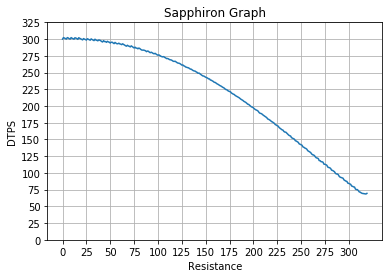

In [18]:
rep = 1000
sec = 300
maxResistance = 320

auraInterval = 2
tickInterval = 1
auraDuration = 5
tickDmg = 600

resArray = []
dtpsArray = []

for res in range(maxResistance):
    avgRes = min(0.75, (res/(63 * 5))*0.75)
    totalDmg = 0
    for i in range(rep):
        auraApplied = 0
        for j in range(sec):
            if j % auraInterval == 0:
                rnd = random.randint(0, 100)
                if rnd >= avgRes*100:
                    auraApplied = auraDuration
                    continue
            if j % tickInterval == 0:
                if auraApplied > 0:
                    totalDmg += tickDmg*(1-avgRes)
                    auraApplied -= tickInterval
    totalDmg /= rep
    dtps = totalDmg/sec
    resArray.append(res)
    dtpsArray.append(dtps)

plt.plot(resArray, dtpsArray)
plt.xlabel('Resistance') 
plt.ylabel('DTPS') 
plt.title('Sapphiron Graph')
plt.xticks(np.arange(0, maxResistance, 25))
plt.yticks(np.arange(0, max(dtpsArray)+25, 25))
plt.grid(True)
plt.show()